# Transmon

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bfqcircuits.core import transmon as trm

In [2]:
from importlib import reload
reload(trm)

<module 'bfqcircuits.core.transmon' from 'C:\\Users\\martin\\Documents\\Python\\bfqCircuits\\src\\bfqcircuits\\core\\transmon.py'>

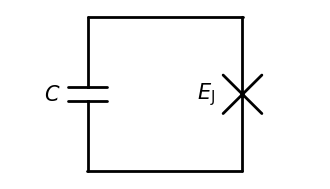

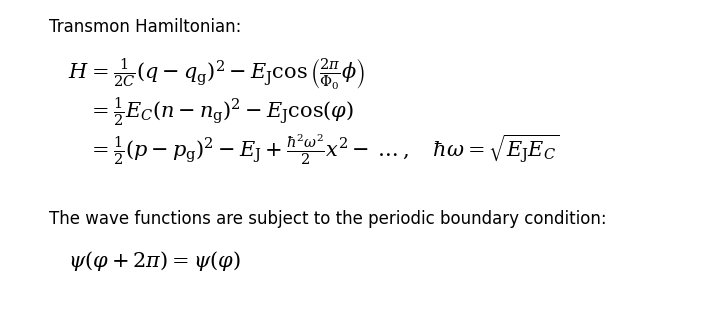

In [3]:
transmon = trm.Transmon()
fig = transmon.draw_circuit()
fig = transmon.show_formulas()

In [4]:
C = 25.0e-15
Ej = 10.0
N = 25

transmon = trm.Transmon()
transmon.set_parameters(C=C, Ej=Ej, N=N)
print(transmon.__repr__())

C = 2.5000e-14
Ec = 6.1985e+00
Ej = 1.0000e+01,
w = 7.8730e+00
Ej / Ec = 7.8730e+00



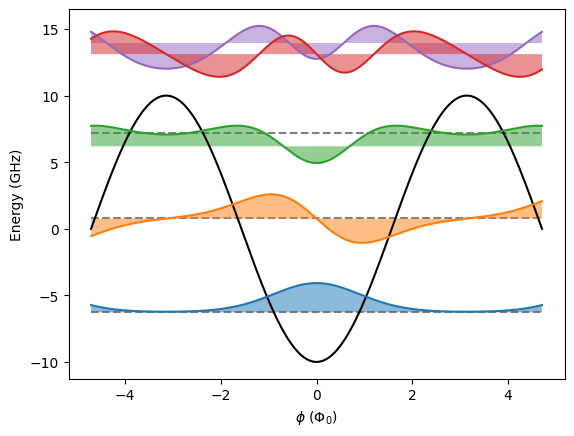

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

transmon.set_parameters(ng=0.0)
transmon.diagonalize_hamiltonian()
transmon.plot_transmon(ax, 5, x_range=1.5, remove_ng=True, fill_between=True, scale=1.0)

E_approx = transmon.energies_first_order_approx()
for i in range(3):
    ax.plot((-1.5 * np.pi, 1.5 *np.pi), (E_approx[i], E_approx[i]), color="grey", ls="--", zorder=-1)

plt.show()

## Parameter sweeps
- the program is designed for 1D sweeps of the circuit parameters
- for the transmon certainly most important is the sweep of the offset charge

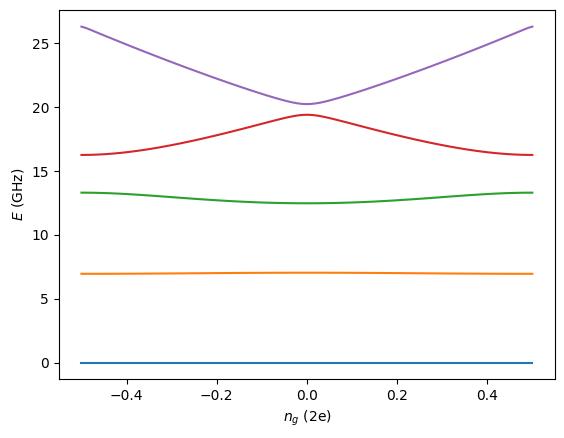

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

transmon.sweep_offset_charge(np.linspace(-0.5, 0.5, 101))
transmon.substract_groundstate_energy_sweep()
transmon.plot_energy_sweep(ax, np.arange(5))

ax.set_xlabel("$n_g$ (2e)")

plt.show()

[10.]
-0.5


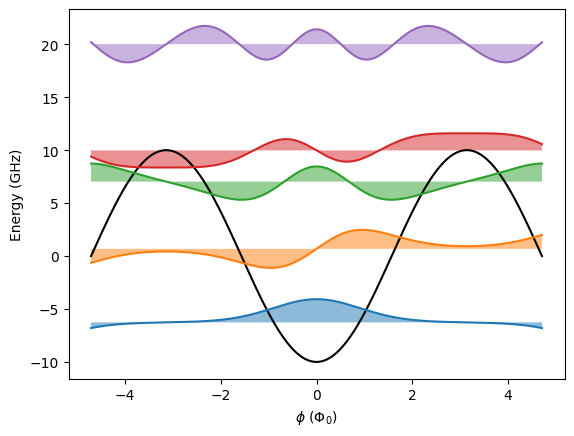

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

transmon.add_groundstate_energy_sweep()
transmon.inspect_sweep(0)
print(transmon.Ej)
print(transmon.ng)

transmon.plot_transmon(ax, 5, x_range=1.5, remove_ng=True, fill_between=True)

plt.show()

## Anharmonicity

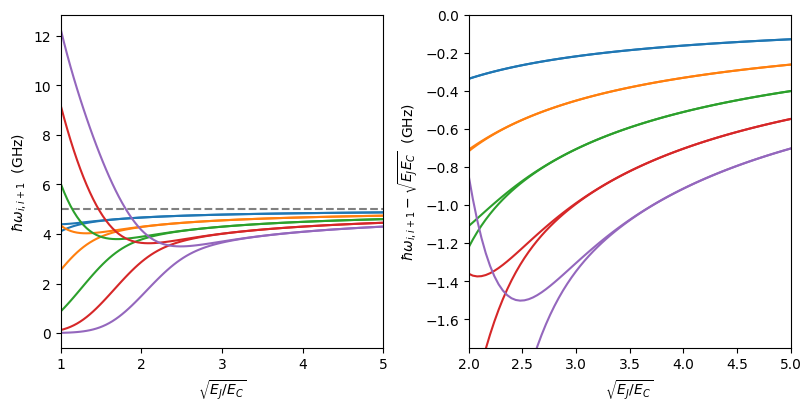

In [8]:
fig = plt.figure(figsize=(8, 4), constrained_layout=True)
ax = fig.add_subplot(121)

Ej_times_Ec = 5.0**2
Ej_over_Ec = np.linspace(1.0, 5.0, 101)**2

Ej_sweep = np.sqrt(Ej_times_Ec * Ej_over_Ec)
Ec_sweep = np.sqrt(Ej_times_Ec / Ej_over_Ec)

transmon.set_parameters(ng=0.0)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": Ej_sweep})
Ee = transmon.E_sweep

transmon.set_parameters(ng=0.5)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": Ej_sweep})
Eo = transmon.E_sweep

ax.axhline(np.sqrt(Ej_times_Ec), color="grey", ls="--")

for i in range(5):
    ax.plot(np.sqrt(Ej_over_Ec), Ee[i + 1, :] - Ee[i, :], transmon.colors[i])
    ax.plot(np.sqrt(Ej_over_Ec), Eo[i + 1, :] - Eo[i, :], transmon.colors[i])

ax.set_xlim(1, 5)
ax.set_xlabel(r"$\sqrt{E_J / E_C}$")
ax.set_ylabel(r"$\hbar \omega_{i,i+1}$  (GHz)")

ax = fig.add_subplot(122)
for i in range(5):
    ax.plot(np.sqrt(Ej_over_Ec), Ee[i + 1, :] - Ee[i, :] - np.sqrt(Ej_times_Ec), transmon.colors[i])
    ax.plot(np.sqrt(Ej_over_Ec), Eo[i + 1, :] - Eo[i, :] - np.sqrt(Ej_times_Ec), transmon.colors[i])

ax.set_xlim(2, 5)
ax.set_ylim(-1.75, 0)
ax.set_xlabel(r"$\sqrt{E_J / E_C}$")
ax.set_ylabel(r"$\hbar \omega_{i,i+1} - \sqrt{E_J E_C}$  (GHz)")

plt.show()

## Charge dispersion

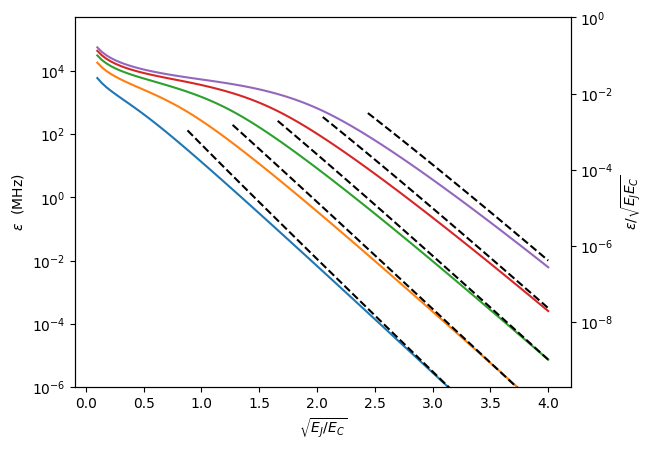

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

Ej_times_Ec = 5.0**2
Ej_over_Ec = np.linspace(0.1, 4.0, 101)**2

Ej_sweep = np.sqrt(Ej_times_Ec * Ej_over_Ec)
Ec_sweep = np.sqrt(Ej_times_Ec / Ej_over_Ec)

transmon.set_parameters(ng=0.0)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": Ej_sweep})
Ee = transmon.E_sweep

transmon.set_parameters(ng=0.5)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": Ej_sweep})
Eo = transmon.E_sweep

for i in range(5):
    ax.plot(np.sqrt(Ej_over_Ec), 1e3 * np.abs(Ee[i, :] - Eo[i, :]))

e = transmon.charge_dispersion_approx(Ej_over_Ec, 5)
for i in range(5):
    ax.plot(np.sqrt(Ej_over_Ec)[20 + 10 * i:], 1e3 * e[i, 20 + 10 * i:] * np.sqrt(Ej_times_Ec), "k--")

ax.set_yscale("log")
ax.set_ylim(1e-6, 5e5)

ax.set_xlabel(r"$\sqrt{E_J / E_C}$")
ax.set_ylabel(r"$\epsilon$  (MHz)")

axt = ax.twinx()
axt.set_yscale("log")
axt.set_ylim(1e-6 / (1e3 * np.sqrt(Ej_times_Ec)), 5e3 / (1e3 * np.sqrt(Ej_times_Ec)))
axt.set_ylabel(r"$\epsilon / \sqrt{E_J E_C}$")

plt.show()

## Convergence

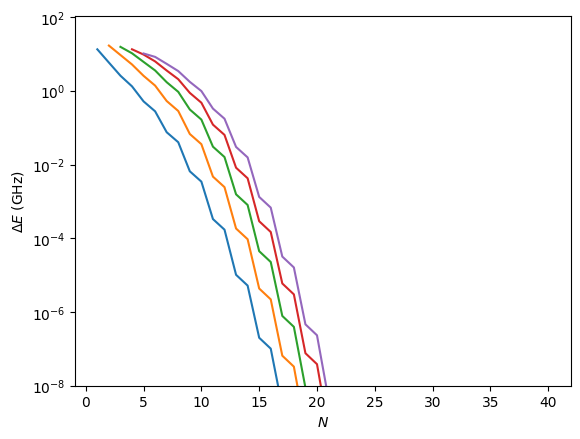

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

Ej_times_Ec = 5.0**2
Ej_over_Ec = 10
transmon.set_parameters(Ec=np.sqrt(Ej_times_Ec / Ej_over_Ec), Ej=np.sqrt(Ej_times_Ec * Ej_over_Ec), ng=0.0)
transmon.convergence_sweep(40)
transmon.plot_convergence_sweep(ax, 5)

ax.set_yscale("log")
ax.set_ylim(bottom=1e-8)

plt.show()

## Matrix elements

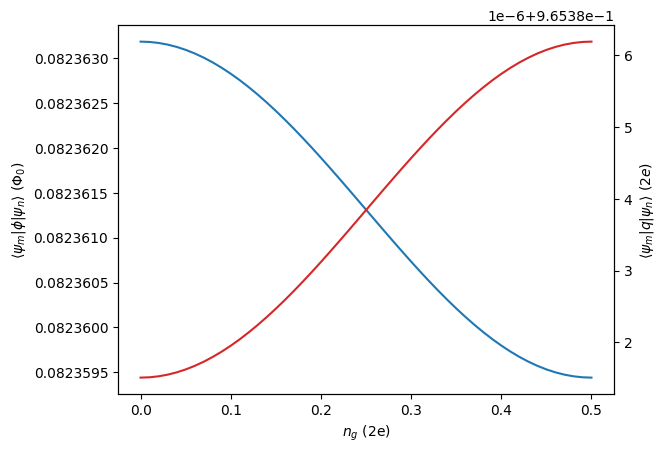

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

Ej_times_Ec = 5.0**2
Ej_over_Ec = 4
transmon.set_parameters(Ec=np.sqrt(Ej_times_Ec / Ej_over_Ec), 
                        Ej=np.sqrt(Ej_times_Ec * Ej_over_Ec), ng=0.0, N=31)
transmon.sweep_offset_charge(np.linspace(0.0, 0.5, 51))
transmon.substract_groundstate_energy_sweep()

flux_dm, charge_dm = transmon.calc_dipole_moments_sweep(0, 1)

ax.plot(transmon.par_sweep, flux_dm, color="C0")
ax.set_ylabel(r"")
ax.set_xlabel("$n_g$ (2e)")
ax.set_ylabel(r"$\langle \psi_m|\phi| \psi_n\rangle$ ($\Phi_0$)")

axt = ax.twinx()
axt.plot(transmon.par_sweep, charge_dm, color="C3")
axt.set_ylabel(r"$\langle \psi_m|q| \psi_n\rangle$ ($2e$)")


plt.show()

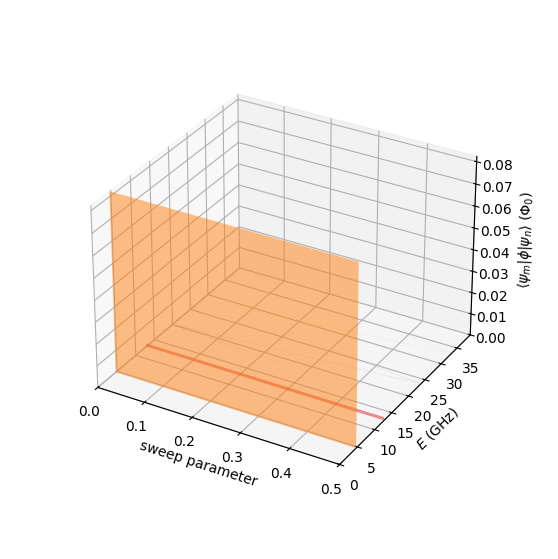

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")

transmon.plot_dipole_to_various_states_sweep(ax, 0, np.arange(10), dipole="flux")

ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

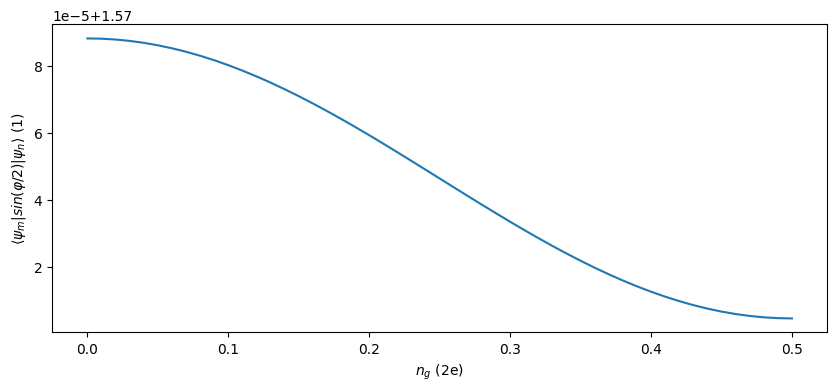

In [13]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

sin_mel = transmon.calc_sin_phi_over_two_sweep(0, 1)
ax.plot(transmon.par_sweep, sin_mel)

ax.set_xlabel("$n_g$ (2e)")
ax.set_ylabel(r"$\langle \psi_m|sin(\varphi / 2)| \psi_n\rangle$ (1)")

plt.show()

## Josephson harmonics

In [14]:
C = 25.0e-15
Ej_1 = 10.0
Ej_2 = -1.0
N = 51

transmon.set_parameters(C=C, Ej=[Ej_1, Ej_2], N=N)
print(transmon.__repr__())

C = 2.5000e-14
Ec = 6.1985e+00
Ej = [1.0000e+01,-1.0000e+00]
w = 7.8730e+00
Ej / Ec = 7.8730e+00



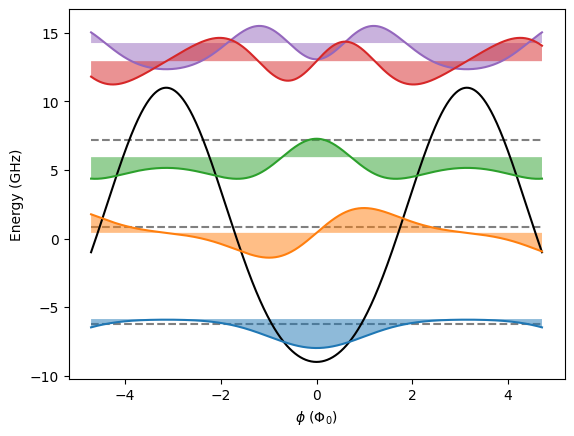

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

transmon.set_parameters(ng=0.0)
transmon.diagonalize_hamiltonian()
transmon.plot_transmon(ax, 5, x_range=1.5, remove_ng=True, fill_between=True, scale=1.0)

E_approx = transmon.energies_first_order_approx()
for i in range(3):
    ax.plot((-1.5 * np.pi, 1.5 *np.pi), (E_approx[i], E_approx[i]), color="grey", ls="--", zorder=-1)

plt.show()

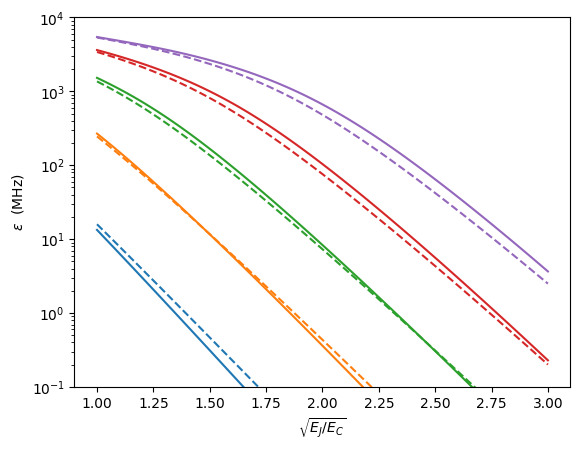

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

Ej_times_Ec = 5.0**2
Ej_over_Ec = np.linspace(1.0, 3.0, 101)**2

Ej_sweep = np.sqrt(Ej_times_Ec * Ej_over_Ec)
Ec_sweep = np.sqrt(Ej_times_Ec / Ej_over_Ec)

transmon.set_parameters(ng=0.0)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": np.vstack((Ej_sweep, - 0.1 * Ej_sweep)).T})
Ee = transmon.E_sweep

transmon.set_parameters(ng=0.5)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": np.vstack((Ej_sweep, - 0.1 * Ej_sweep)).T})
Eo = transmon.E_sweep

for i in range(5):
    ax.plot(np.sqrt(Ej_over_Ec), 1e3 * np.abs(Ee[i, :] - Eo[i, :]), color=transmon.colors[i], ls="--")

# comparison with no harmonics
transmon.set_parameters(ng=0.0)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": Ej_sweep})
Ee = transmon.E_sweep

transmon.set_parameters(ng=0.5)
transmon.sweep_parameter({"Ec": Ec_sweep, "Ej": Ej_sweep})
Eo = transmon.E_sweep

for i in range(5):
    ax.plot(np.sqrt(Ej_over_Ec), 1e3 * np.abs(Ee[i, :] - Eo[i, :]), color=transmon.colors[i], ls="-")

ax.set_yscale("log")
ax.set_ylim(1e-1, 1e4)

ax.set_xlabel(r"$\sqrt{E_J / E_C}$")
ax.set_ylabel(r"$\epsilon$  (MHz)")

plt.show()

## Transmon losses

In [17]:
# work in progress

## More...
- get creative with the code and adapt it to your needs